<a href="https://colab.research.google.com/github/Fabkres/ArtificialIntelligence/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Implementação do Algoritmo k-means**

###Pseudocódigo

Algoritmo K-means:
1. Inicialize o número de clusters (k) e o número máximo de iterações.
2. Inicialize os centroides de forma aleatória.
3. Repita até que a convergência seja alcançada ou o número máximo de iterações seja atingido:
     4. Atribua cada ponto ao cluster cujo centroide é o mais próximo.
     5. Recalcule os centroides de cada cluster como a média dos pontos atribuídos a ele.
     6. Verifique se houve alteração nos centroides. Se não houve, a convergência foi alcançada e pare.
7. Retorne os clusters resultantes.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [97]:
class KMeans:

  def __init__(self, n_clusters, max_iteracoes = 100, init_centroids_kpp = True, plotar_grafico=True):
      self.k = n_clusters
      self.max_interacoes = max_iteracoes
      self.plotar_grafico =plotar_grafico
      self.centroids = None
      self.cluteres = None
      self.function_init_centroids = init_centroids_kpp

  def dist_Euclidiana(self, ponto1, ponto2):
    """Calcula a distância euclidiana entre dois pontos."""
    return np.sqrt(np.sum((np.array(ponto1) - np.array(ponto2))**2))

  
  def init_centroids(self, X):
    """Inicializa os centroides aleatoriamente"""
    self.centroids = random.sample(X, self.k) # pegar k elementos aleatórios (sem repetição) do meu dataset
    return self.centroids

  def init_centroids_kmeansPP(self, X):
    """Inicializa os centroides usando o método kmeans++"""
    self.centroids = []
    self.centroids.append(random.choice(X))
    for _ in range(1, self.k):
      distancias = [min([self.dist_Euclidiana(ponto, centroid) for centroid in self.centroids]) for ponto in X]
      probabilidade = distancias / np.sum(distancias)
      new_centroid = random.choices(X, probabilidade)[0]
      self.centroids.append(new_centroid)
    return self.centroids


  def assign_points_to_clusters(self, X):
    """ O método atribuir_pontos_a_clusters itera sobre cada ponto do conjunto de dados, calcula 
        a distância para cada centroide e atribui o ponto ao cluster cujo centroide está mais próximo. 
        Ao final do método, a lista self.clusters terá os pontos agrupados corretamente nos clusters correspondentes."""
    self.clusteres = [[] for _ in range(self.k)]
    for ponto in X:
      distancias = [self.dist_Euclidiana(ponto, centroid) for centroid in self.centroids]
      cluster_atual = distancias.index(min(distancias))
      self.clusteres[cluster_atual].append(ponto)
    return self.clusteres


  def update_centroids(self):
    """o método atualizar_centroides percorre cada cluster, calcula a média dos pontos do cluster para obter o novo centroide e atualiza o centroide do cluster. 
      Ao final, o método retorna True se os centroides não foram alterados ou False caso tenham ocorrido alterações. 
      Essa verificação é usada no método fit para determinar se o algoritmo convergiu (ou seja, os centroides não estão mais mudando) e encerrar o processo 
      de ajuste."""
    centroids_old = self.centroids.copy()
    for i, cluster in enumerate(self.clusteres): # o índice quanto o valor do elemento durante a iteração
      new_centroid = np.mean(cluster, axis=0) if cluster else self.centroids[i]
      self.centroids[i] = new_centroid
    return np.array_equal(self.centroids, centroids_old)


  def fit(self, X):
    """o método fit executa o algoritmo K-means no conjunto de dados fornecido, atualizando os centroides e atribuindo os pontos aos clusters 
      correspondentes em cada iteração. Ele continua a execução até que ocorra convergência (os centroides não mudem) ou atinja o número máximo 
      de iterações definido. A cada iteração, também gera um gráfico dos clusters para visualização."""
    dados = list(X)
    self.init_centroids_kmeansPP(dados) if self.function_init_centroids else self.init_centroids(dados)
      
    count_iteration = 0
    for _ in range(self.max_interacoes):
      self.assign_points_to_clusters(dados)
      converge = self.update_centroids()
      count_iteration+=1
      if converge:
        print('Total de iterações até convergência',count_iteration)
        break
      if (self.plotar_grafico):
        self.plot_kmeans() 

  def plot_kmeans(self):
    plt.figure(figsize=(4, 4))
    for i, cluster in enumerate(self.clusteres):
       x = [point[0] for point in cluster]
       y = [point[1] for point in cluster]
       plt.scatter(x, y, label=f"Cluster {i+1}")      
    centroids_X = [centroid[0] for centroid in self.centroids]
    centroids_Y = [centroid[1] for centroid in self.centroids]
    plt.scatter(centroids_X, centroids_Y, label='Centroids', color='black', marker='+')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KMeans Algorithm')
    plt.legend()
    plt.show()



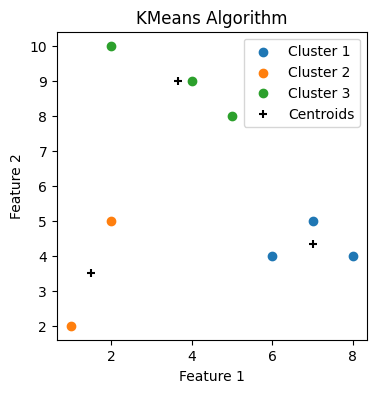

Total de iterações até convergência 2


In [98]:
X=[[2, 10], [2, 5], [8, 4],[5, 8], [7,5],[6, 4], [1,2],[4,9]]

# Exemplo de uso
# X = [
#     [1, 2],
#     [2, 1],
#     [10, 12],
#     [12, 10],
#     [20, 25],
#     [22, 23]
# ]

kmeans = KMeans(3, init_centroids_kpp=True)
kmeans.fit(X)

###Usando base de dados make blobs

In [99]:
from sklearn.datasets import make_blobs


X, _= make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)


kmeans = KMeans(4, 1000, init_centroids_kpp = True, plotar_grafico=False)
kmeans.fit(X)

Total de iterações até convergência 11


###Usando a base de dados iris

In [100]:
from sklearn.datasets import load_iris
#--------------------------------------------------------------------------------
    # Carregar conjunto de dados Iris
iris = load_iris()
dados = iris.data[:, :2]  # Utilizar apenas as duas primeiras características

k = 4  # Número de clusters desejado
iteracoes = 100
kmeans = KMeans(k, iteracoes, plotar_grafico=False)
kmeans.fit(dados)


Total de iterações até convergência 8


#Usando a biblioteca SKLEARN

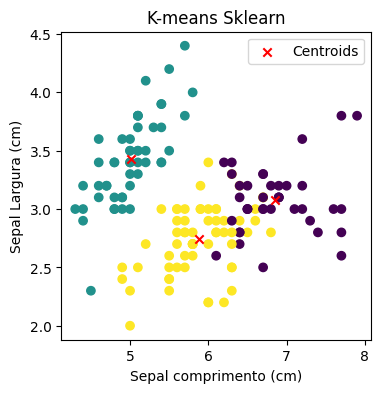

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
kmeans.fit(X)

# Obter os centróides e rótulos dos clusters
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotar os dados com as cores representando os clusters
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', label='Centroids')
plt.xlabel('Sepal comprimento (cm)')
plt.ylabel('Sepal Largura (cm)')
plt.title('K-means Sklearn')
plt.legend()
plt.show()

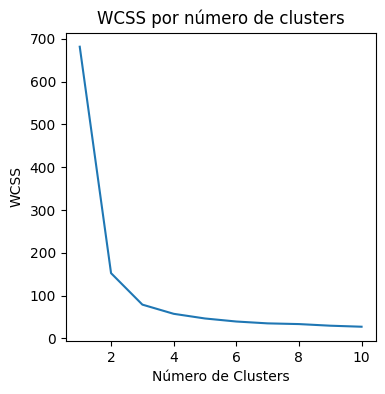

In [116]:
# Calcular o WCSS para diferentes valores de n_clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Gerar o gráfico do WCSS
plt.figure(figsize=(4, 4))
plt.plot(range(1, 11), wcss)
plt.title("WCSS por número de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.show()